In [1]:
import numpy as np
import math as math
import matplotlib.pyplot as plt

In [2]:
kb=1.38e-23#Boltzmanns constant, in the unit of J/K
hp=6.626e-34#Planck constant, in the unit of J s
vc=3.0e8#The speed of light, in the unit of m/s
lam1=6.0e-7#lower desired wavelength, in the unit of m
lam2=7.5e-7#higher desired wavelength,in the unit of m

In [3]:
Tlow=300
Thigh=10000
tem=np.arange(Tlow,Thigh+1,100)#Temperature in the unit of K
#Temperature array
num_t=len(tem)
print(num_t)

98


In [4]:
b=hp*vc/(lam1*kb*tem)#upper limitation of integral
a=hp*vc/(lam2*kb*tem)#lower limitation of integral
N=100
h=(b-a)/N

In [5]:
def x(lam,temp):
    x=hp*vc/(lam*kb*temp)
    return x

In [6]:
def fx(x):
    fx=(x**3)/((np.exp(x))-1)
    return fx

In [7]:
R=[]
tempR=[]
#create the 2D array
Rt=np.zeros([N+1,N+1],float)
record=0

In [8]:
for t in range(num_t):
    R.append(record)
    tempR.append(Rt)
    
    temp=tem[t]
    at=a[t]
    bt=b[t]
    fa=fx(at)
    fb=fx(bt)
    
    s=0.5*(fa+fb)
 
    Rt[0,0]=s
    for i in range(1,N+1):
        ht=(bt-at)/i
        for k in range(1,i):
            s += fx(at+(k*ht))
        Rt[i,0]=ht*s 
        for m in range(0,i):
            Rt[i,m+1]=Rt[i,m]+(1/((4**(m+1))-1))*(Rt[i,m]-Rt[i-1,m])
    record=Rt[N,N]*15.0/(np.pi**4)

In [9]:
print(Rt)

[[  1.29778027   0.           0.         ...,   0.           0.           0.        ]
 [  0.62312261   0.39823673   0.         ...,   0.           0.           0.        ]
 [  0.62700148   0.62829444   0.64363162 ...,   0.           0.           0.        ]
 ..., 
 [ 30.48329828  30.58799211  30.60893091 ...,  30.61555731   0.           0.        ]
 [ 30.79738106  30.90207532  30.9230142  ...,  30.92964064  30.92964064
    0.        ]
 [ 31.11146509  31.21615977  31.23709873 ...,  31.24372519  31.24372519
   31.24372519]]


In [10]:
#print(R)
print(len(R))


98


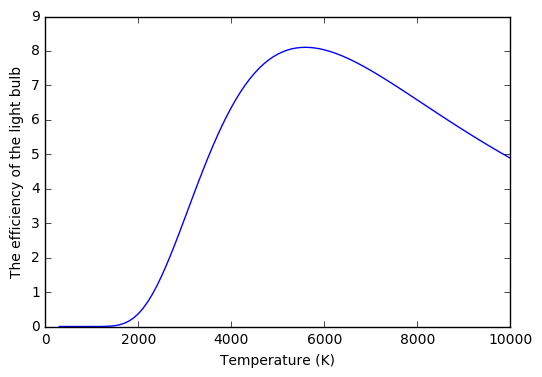

In [11]:
#Rcal=(15.0/(3.14**4))*R
Ra=np.asarray(R)
plt.plot(tem,Ra)
plt.xlabel("Temperature (K)")
plt.ylabel("The efficiency of the light bulb")
plt.show()

In [12]:
print(np.argmax(Ra))

53


In [13]:
num_max=np.argmax(Ra)
print(tem[num_max])

5600
